## Assignment 6

In [38]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


## Load the Iris dataset

In [39]:
import pandas as pd
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal Length','Sepal Width','Petal Length','Petal Width','Species'], header=None)
iris = iris.dropna()

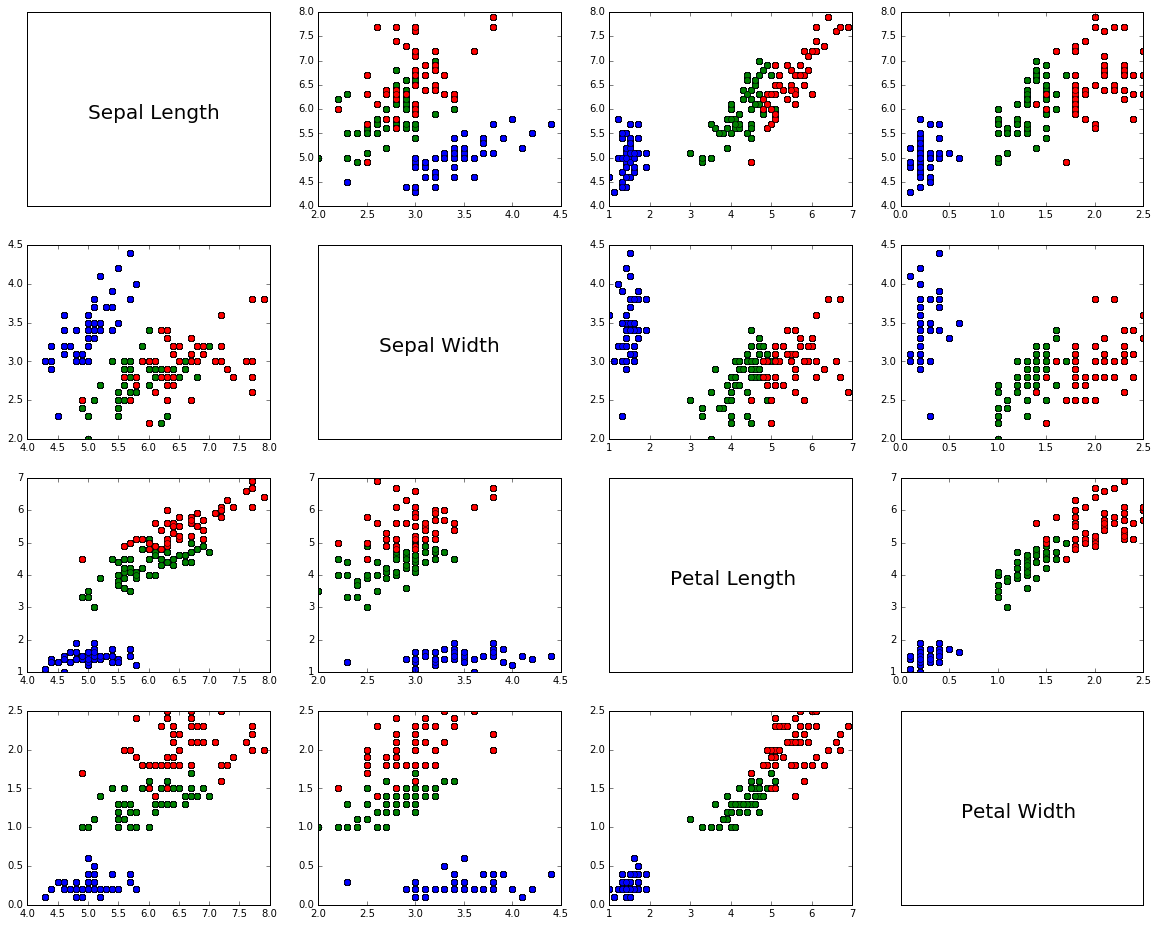

In [40]:

pairs(iris)

## Linear regression model

In [51]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import numpy as np
from sklearn import linear_model

# Use all the features
iris_SL = iris['Sepal Length']
iris_PL = iris['Petal Length']
iris_PW = iris['Petal Width']
iris_SW = iris['Sepal Width']

# Split the individual features manually for training/testing sets respectively
iris_SL_train = iris_SL[:-20].reshape(-1,1)
iris_SL_test = iris_SL[-20:].reshape(-1,1)

iris_PL_train = iris_PL[:-20].reshape(-1,1)
iris_PL_test = iris_PL[-20:].reshape(-1,1)

iris_SW_train = iris_SW[:-20].reshape(-1,1)
iris_SW_test = iris_SW[-20:].reshape(-1,1)

iris_PW_train = iris_PW[:-20].reshape(-1,1)
iris_PW_test = iris_PW[-20:].reshape(-1,1)

# Create linear regression object
regr = linear_model.LinearRegression()

Automatically created module for IPython interactive environment


## Petal length from Sepal length 

Coefficients: 
 [[ 1.88383251]]
Mean squared error: 0.70
Variance score: -3.20


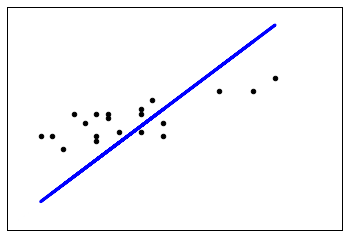

In [50]:
# Train the model using the training sets
regr.fit(iris_SL_train, iris_PL_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(iris_SL_test) - iris_PL_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(iris_SL_test, iris_PL_test))

# Plot outputs
pl.scatter(iris_SL_test, iris_PL_test,  color='black')
pl.plot(iris_SL_test, regr.predict(iris_SL_test), color='blue',
         linewidth=3)

pl.xticks(())
pl.yticks(())

pl.show()

## Petal width from Sepal length

Coefficients: 
 [[ 0.73457933]]
Mean squared error: 0.29
Variance score: -2.29


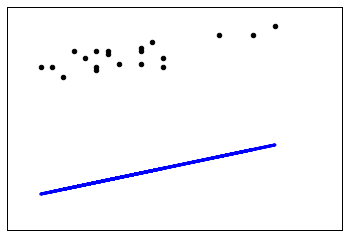

In [52]:
# Train the model using the training sets
regr.fit(iris_SL_train, iris_PW_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(iris_SL_test) - iris_PW_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(iris_SL_test, iris_PW_test))

# Plot outputs
pl.scatter(iris_SL_test, iris_PL_test,  color='black')
pl.plot(iris_SL_test, regr.predict(iris_SL_test), color='blue',
         linewidth=3)

pl.xticks(())
pl.yticks(())

pl.show()

## Sepal width from Sepal length

Coefficients: 
 [[-0.08347253]]
Mean squared error: 0.10
Variance score: -0.19


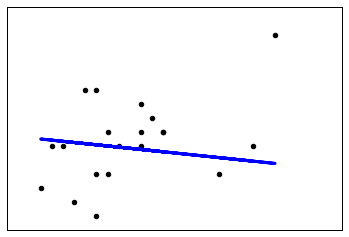

In [53]:
# Train the model using the training sets
regr.fit(iris_SL_train, iris_SW_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(iris_SL_test) - iris_SW_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(iris_SL_test, iris_SW_test))

# Plot outputs
pl.scatter(iris_SL_test, iris_SW_test,  color='black')
pl.plot(iris_SL_test, regr.predict(iris_SL_test), color='blue',
         linewidth=3)

pl.xticks(())
pl.yticks(())

pl.show()

## Sepal length from petal length

Coefficients: 
 [[ 0.39870306]]
Mean squared error: 0.20
Variance score: 0.35


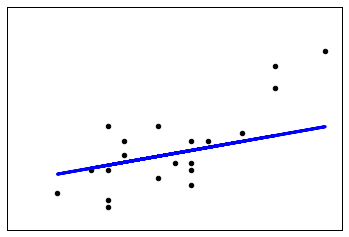

In [54]:
# Train the model using the training sets
regr.fit(iris_PL_train, iris_SL_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(iris_PL_test) - iris_SL_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(iris_PL_test, iris_SL_test))

# Plot outputs
pl.scatter(iris_PL_test, iris_SL_test,  color='black')
pl.plot(iris_PL_test, regr.predict(iris_PL_test), color='blue',
         linewidth=3)

pl.xticks(())
pl.yticks(())

pl.show()

## Petal width from petal length

Coefficients: 
 [[ 0.40396986]]
Mean squared error: 0.12
Variance score: -0.40


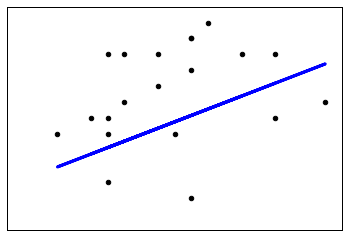

In [55]:
# Train the model using the training sets
regr.fit(iris_PL_train, iris_PW_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(iris_PL_test) - iris_PW_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(iris_PL_test, iris_PW_test))

# Plot outputs
pl.scatter(iris_PL_test, iris_PW_test,  color='black')
pl.plot(iris_PL_test, regr.predict(iris_PL_test), color='blue',
         linewidth=3)

pl.xticks(())
pl.yticks(())

pl.show()

## Sepal width from petal length

Coefficients: 
 [[-0.12301775]]
Mean squared error: 0.15
Variance score: -0.76


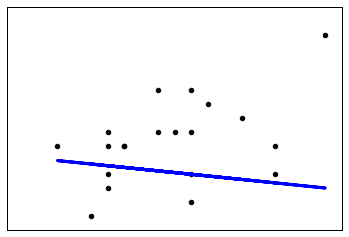

In [56]:
# Train the model using the training sets
regr.fit(iris_PL_train, iris_SW_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(iris_PL_test) - iris_SW_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(iris_PL_test, iris_SW_test))

# Plot outputs
pl.scatter(iris_PL_test, iris_SW_test,  color='black')
pl.plot(iris_PL_test, regr.predict(iris_PL_test), color='blue',
         linewidth=3)

pl.xticks(())
pl.yticks(())

pl.show()

## Petal length from Petal width

Coefficients: 
 [[ 2.32900634]]
Mean squared error: 0.59
Variance score: -2.56


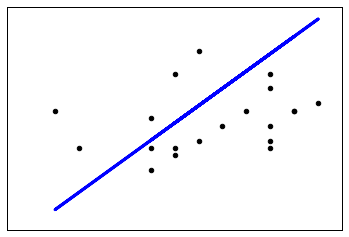

In [48]:
# Train the model using the training sets
regr.fit(iris_PW_train, iris_PL_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(iris_PW_test) - iris_PL_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(iris_PW_test, iris_PL_test))

# Plot outputs
pl.scatter(iris_PW_test, iris_PL_test,  color='black')
pl.plot(iris_PW_test, regr.predict(iris_PW_test), color='blue',
         linewidth=3)

pl.xticks(())
pl.yticks(())

pl.show()

## Sepal length from petal width

Coefficients: 
 [[ 0.89632951]]
Mean squared error: 0.27
Variance score: 0.10


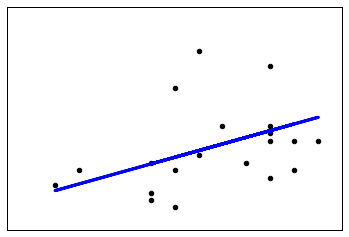

In [57]:
# Train the model using the training sets
regr.fit(iris_PW_train, iris_SL_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(iris_PW_test) - iris_SL_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(iris_PW_test, iris_SL_test))

# Plot outputs
pl.scatter(iris_PW_test, iris_SL_test,  color='black')
pl.plot(iris_PW_test, regr.predict(iris_PW_test), color='blue',
         linewidth=3)

pl.xticks(())
pl.yticks(())

pl.show()

## Sepal width from petal width

Coefficients: 
 [[-0.26605705]]
Mean squared error: 0.17
Variance score: -1.03


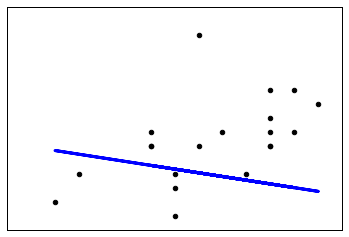

In [58]:
# Train the model using the training sets
regr.fit(iris_PW_train, iris_SW_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(iris_PW_test) - iris_SW_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(iris_PW_test, iris_SW_test))

# Plot outputs
pl.scatter(iris_PW_test, iris_SW_test,  color='black')
pl.plot(iris_PW_test, regr.predict(iris_PW_test), color='blue',
         linewidth=3)

pl.xticks(())
pl.yticks(())

pl.show()

## Petal length from sepal width

Coefficients: 
 [[-1.83761094]]
Mean squared error: 4.43
Variance score: -25.52


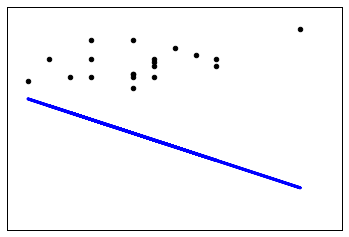

In [59]:
# Train the model using the training sets
regr.fit(iris_SW_train, iris_PL_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(iris_SW_test) - iris_PL_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(iris_SW_test, iris_PL_test))

# Plot outputs
pl.scatter(iris_SW_test, iris_PL_test,  color='black')
pl.plot(iris_SW_test, regr.predict(iris_SW_test), color='blue',
         linewidth=3)

pl.xticks(())
pl.yticks(())

pl.show()

## Sepal length from sepal width

Coefficients: 
 [[-0.26389832]]
Mean squared error: 1.09
Variance score: -2.60


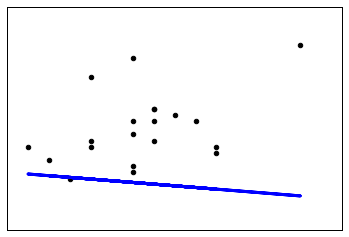

In [60]:
# Train the model using the training sets
regr.fit(iris_SW_train, iris_SL_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(iris_SW_test) - iris_SL_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(iris_SW_test, iris_SL_test))

# Plot outputs
pl.scatter(iris_SW_test, iris_SL_test,  color='black')
pl.plot(iris_SW_test, regr.predict(iris_SW_test), color='blue',
         linewidth=3)

pl.xticks(())
pl.yticks(())

pl.show()

## Petal width from sepal width

Coefficients: 
 [[-0.68934852]]
Mean squared error: 1.14
Variance score: -11.87


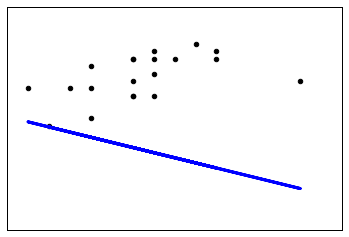

In [61]:
# Train the model using the training sets
regr.fit(iris_SW_train, iris_PW_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(iris_SW_test) - iris_PW_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(iris_SW_test, iris_PW_test))

# Plot outputs
pl.scatter(iris_SW_test, iris_PW_test,  color='black')
pl.plot(iris_SW_test, regr.predict(iris_SW_test), color='blue',
         linewidth=3)

pl.xticks(())
pl.yticks(())

pl.show()

Q1 - Above we have all combination of regressive models based on choosing one dependant with one independant variable. As seen from the plots we can say "Petal length from Petal width" model has the most predictive nature since the variance is less and the points are not scattered based on the function with respect to the other models.

Q2 - If I remove the petal width feature (which is an important predictive feature as seen from above) then the classification will not be proper since that will fail to justify the data related to the model(from Q1) that was just proposed as best fit.